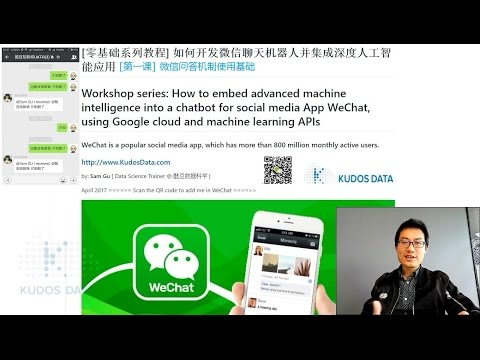

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('W-ZsWqcl1_c')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='reference/logo.png' width=12% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">

### http://www.KudosData.com

by: Sam.Gu@KudosData.com


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ========== Scan the QR code to become trainer's friend in WeChat ========>>

### 第一课：使用微信问答机制
### Lesson 1: Basic usage of WeChat Python API
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### 导入需要用到的一些功能程序库：

In [2]:
# from __future__ import unicode_literals, division
# import time, datetime, requests
import itchat
from itchat.content import *

### * 用微信App扫QR码图片来自动登录

https://itchat.readthedocs.io/zh/latest/

### 命令行二维码

通过以下命令可以在登陆的时候使用命令行显示二维码：

itchat.auto_login(enableCmdQR=True)

部分系统可能字幅宽度有出入，可以通过将enableCmdQR赋值为特定的倍数进行调整：

itchat.auto_login(enableCmdQR=2) # 如部分的linux系统，块字符的宽度为一个字符（正常应为两字符），故赋值为2

默认控制台背景色为暗色（黑色），若背景色为浅色（白色），可以将enableCmdQR赋值为负值：

itchat.auto_login(enableCmdQR=-1)

### 退出程序后暂存登陆状态

通过如下命令登陆，即使程序关闭，一定时间内重新开启也可以不用重新扫码。

itchat.auto_login(hotReload=True)


In [3]:
# Running in Jupyther Notebook:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
# or
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: Jupyter Notebook 命令行显示QR图片

# Running in Terminal:
# itchat.auto_login(enableCmdQR=2) # enableCmdQR=2: 命令行显示QR图片 

Getting uuid of QR code.


                                                                              
  ██████████████    ████  ██████      ██          ██  ██      ██████████████  
  ██          ██    ██    ██████        ████████    ██        ██          ██  
  ██  ██████  ██  ████████      ████  ████          ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ██████  ████  ██  ████        ████████  ██  ██████  ██  
  ██  ██████  ██    ██  ██    ██  ██  ████████████  ████      ██  ██████  ██  
  ██          ██      ████  ██  ██  ██    ██  ████    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██    ██    ████    ████████  ████  ████                  
        ████  ████  ████    ████                ██                  ████      
    ████    ██  ████                      ████      ██  ████████████  ████    
    ████████  ██  ██  ██████  ██████        ████  ████  ████████      ██  ██  
    ████        ██  ██████  ██    ██  ████  ██      

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


### * 查找指定联系人或群组

使用search_friends方法可以搜索用户，有几种搜索方式： 


1.仅获取自己的用户信息 


2.获取昵称'NickName'、微信号'Alias'、备注名'RemarkName'中的任何一项等于name键值的用户 


3.获取分别对应相应键值的用户

In [4]:
friend = itchat.search_friends()
# print(friend)

In [5]:
print('NickName  : %s' % friend['NickName'])
print('Alias A-ID: %s' % friend['Alias'])
print('RemarkName: %s' % friend['RemarkName'])
print('UserName  : %s' % friend['UserName'])

NickName  : 白黑
Alias A-ID: 
RemarkName: 
UserName  : @78ff06cd3e0e745008daacdf14930a9e


In [12]:
print()
print(u'[ WeChat Software Robot 微信人工智能助手 ]   Copyright © 2018 GU Zhan (Sam)   SOME RIGHTS RESERVED')
print()
print(u'[ Functions 演示功能介绍 ]')
print(u'[ 1 ] 如果收到[TEXT, MAP, CARD, NOTE, SHARING]类的信息，会自动回复')
print(u'      @itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING]) # 文字、位置、名片、通知、分享')
print(u'[ 2 ] 如果收到[PICTURE, RECORDING, ATTACHMENT, VIDEO]类的信息，会自动保存')
print(u'      @itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO]) # 图片、语音、文件、视频')
print(u'[ 3 ] 如果收到新朋友的请求，会自动通过验证添加加好友，并主动打个招呼：幸会幸会！Nice to meet you!')
print(u'      @itchat.msg_register(FRIENDS)')
print(u'[ 4 ] 在群里，如果收到@自己的文字信息，会自动回复')
print(u'      @itchat.msg_register(TEXT, isGroupChat=True)')
print()
print(u'[ Source Code 源代码 Py2 Cloud Version ] https://github.com/telescopeuser/workshop_blog')
print(u'[ Source Code 源代码 Py3 Local Version ] https://github.com/telescopeuser/workshop_blog_py3_local')
print()



[ WeChat Software Robot 微信人工智能助手 ]   Copyright © 2018 GU Zhan (Sam)   SOME RIGHTS RESERVED

[ Functions 演示功能介绍 ]
[ 1 ] 如果收到[TEXT, MAP, CARD, NOTE, SHARING]类的信息，会自动回复
      @itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING]) # 文字、位置、名片、通知、分享
[ 2 ] 如果收到[PICTURE, RECORDING, ATTACHMENT, VIDEO]类的信息，会自动保存
      @itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO]) # 图片、语音、文件、视频
[ 3 ] 如果收到新朋友的请求，会自动通过验证添加加好友，并主动打个招呼：幸会幸会！Nice to meet you!
      @itchat.msg_register(FRIENDS)
[ 4 ] 在群里，如果收到@自己的文字信息，会自动回复
      @itchat.msg_register(TEXT, isGroupChat=True)

[ Source Code 源代码 Py2 Cloud Version ] https://github.com/telescopeuser/workshop_blog
[ Source Code 源代码 Py3 Local Version ] https://github.com/telescopeuser/workshop_blog_py3_local



### * 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息

In [7]:
# 如果收到[TEXT, MAP, CARD, NOTE, SHARING]类的信息，会自动回复：
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING]) # 文字、位置、名片、通知、分享
def text_reply(msg):
    print(u'[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ %s ] %s From: %s' 
          % (msg['Type'], msg['Text'], msg['FromUserName']))
    itchat.send(u'Thank you! 谢谢亲[嘴唇]我已收到\nI received:\n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])

# 如果收到[PICTURE, RECORDING, ATTACHMENT, VIDEO]类的信息，会自动保存：
@itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO]) # 图片、语音、文件、视频
def download_files(msg):
    msg['Text'](msg['FileName'])
    print(u'[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ %s ] %s From: %s' 
          % ({'Picture': 'img', 'Video': 'vid'}.get(msg['Type'], 'fil'), msg['FileName'], msg['FromUserName']))
    itchat.send(u'Thank you! 谢谢亲[嘴唇]我已收到\nI received:', msg['FromUserName'])
    return '@%s@%s' % ({'Picture': 'img', 'Video': 'vid'}.get(msg['Type'], 'fil'), msg['FileName'])

# 如果收到新朋友的请求，会自动通过验证添加加好友，并主动打个招呼：幸会幸会！Nice to meet you!
@itchat.msg_register(FRIENDS)
def add_friend(msg):
    print(u'[ Terminal Info ] New Friend Request 新朋友的请求，自动通过验证添加加好友 From: %s' % msg['RecommendInfo']['UserName']) 
    itchat.add_friend(**msg['Text']) # 该操作会自动将新好友的消息录入，不需要重载通讯录
    itchat.send_msg(u'幸会幸会！Nice to meet you!', msg['RecommendInfo']['UserName'])

# 在群里，如果收到@自己的文字信息，会自动回复：
@itchat.msg_register(TEXT, isGroupChat=True)
def text_reply(msg):
    if msg['isAt']:
        print(u'[ Terminal Info ] Group@Info 在群里收到@自己的文字信息: %s From: %s %s' 
              % (msg['Content'], msg['ActualNickName'], msg['FromUserName']))
        itchat.send(u'@%s\u2005I received: %s' % (msg['ActualNickName'], msg['Content']), msg['FromUserName'])


In [8]:
itchat.run()

Start auto replying.


[ Terminal Info ] 谢谢亲[嘴唇]我已收到 I received: [ img ] 181025-102904.png From: @78ff06cd3e0e745008daacdf14930a9e


Bye~


In [9]:
# interupt, then logout
# itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

### 恭喜您！已经能够使用微信问答机制了。
* 使用和开发微信个人号聊天机器人：一种Python编程接口 (Use WeChat Python API)
* 用微信App扫QR码图片来自动登录 (Log-in, contact scan, and processing of text, image, file, video, etc)
* 查找指定联系人或群组 (Scan ccontact list)
* 发送信息（文字、图片、文件、音频、视频等） (Send message: text, image, file, voice, video, etc)
* 接收信息 (Receive message, and keep 'listening')
* 自动回复 (Receive message and then automaticaly reply)
* 自定义复杂消息处理，例如：信息存档、回复群组中被@的消息 (Advanced message processing and reply)

### 下一课是第二课：图像识别和处理
### Lesson 2: Image Recognition & Processing
* 识别图片消息中的物体名字 (Recognize objects in image)
* 识别图片消息中的文字 (OCR: Extract text from image)
* 识别人脸 (Recognize human face)
* 基于人脸的表情来识别喜怒哀乐等情绪 (Identify semtiment and emotion from human face)

<img src='../reference/logo.png' width=12% style="float: right;">

<img src='../reference/WeChat_SamGu_QR.png' width=10% style="float: left;">



---